# Churn_Prediction_with_RandomForest

In [61]:
# Import necessary libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Suppress warnings to keep output clean

import warnings
warnings.filterwarnings('ignore')


pd.set_option("display.max_rows", 10000)
pd.set_option('display.max_columns',15)
pd.set_option('display.width', 10000)

In [62]:
# Load the dataset from a CSV file into a pandas DataFrame

dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
# Check for missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [64]:
# Display dataset info (columns, types, nulls)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
# Show first few rows
dataset = dataset.iloc[:,3:]
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Count unique values in column
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
# Count unique values in column
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [11]:
dataset = pd.get_dummies(dataset, columns=['Geography'])

In [12]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [13]:
# Drop unnecessary columns/rows
dataset = dataset.drop(['Geography_France'], axis=1)

In [14]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [15]:
# Display dataset info (columns, types, nulls)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int8   
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(7), int8(1)
memory usage: 732.6 KB


In [16]:
# for i in dataset.columns:
#     print("**********************************", i ,
#          "*******************************************")
#     print()
#     print(set(dataset[i].tolist()))
#     print()

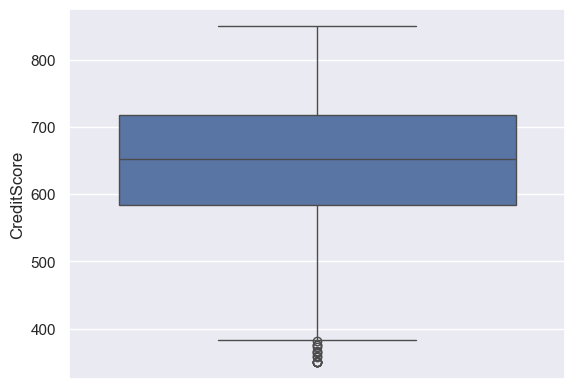

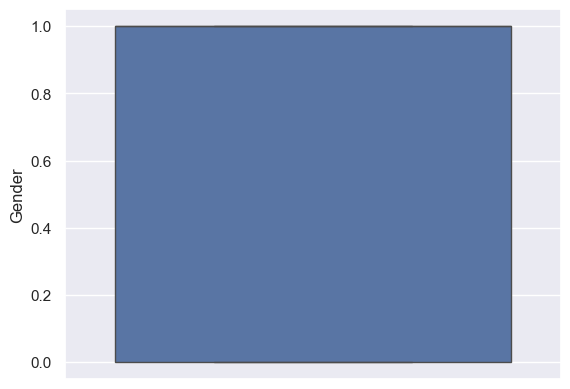

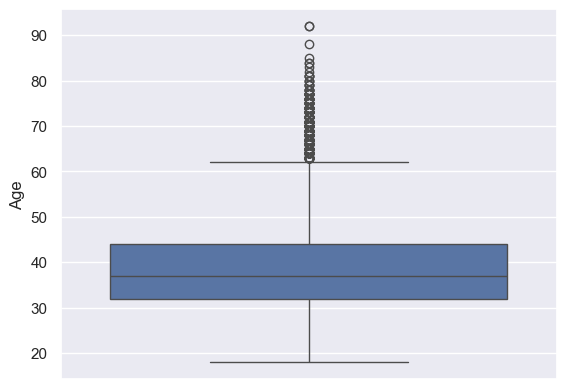

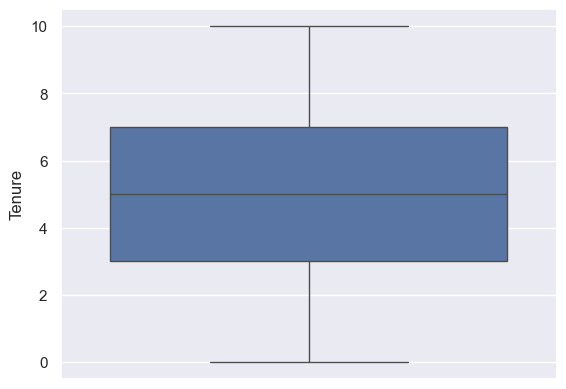

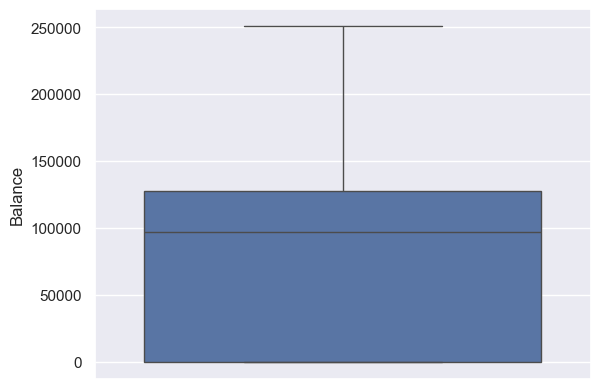

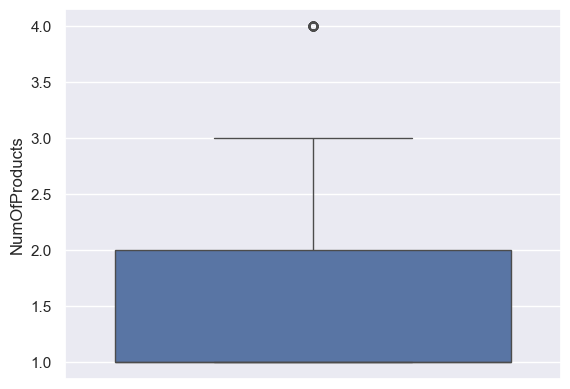

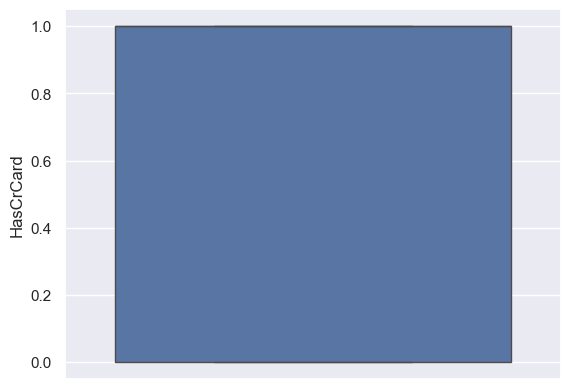

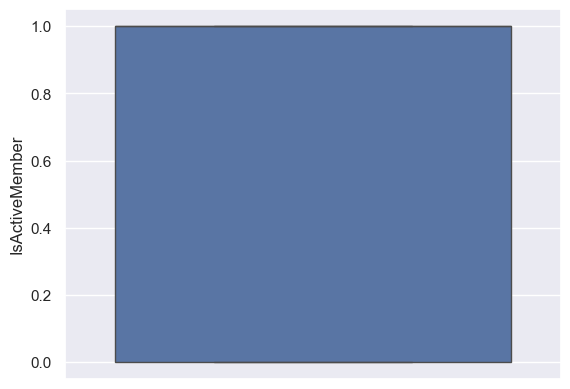

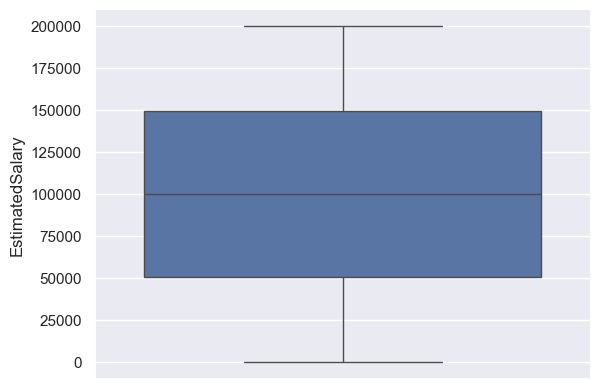

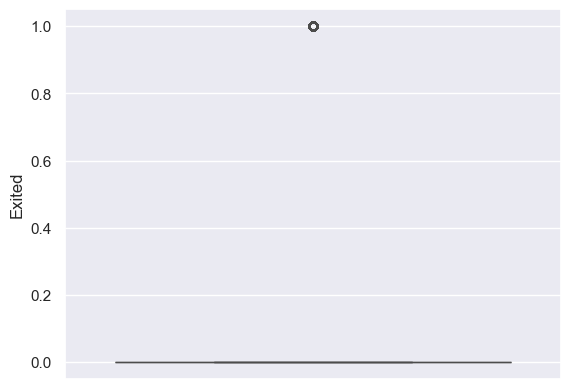

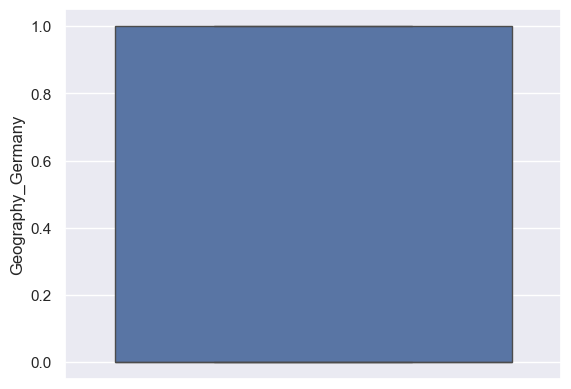

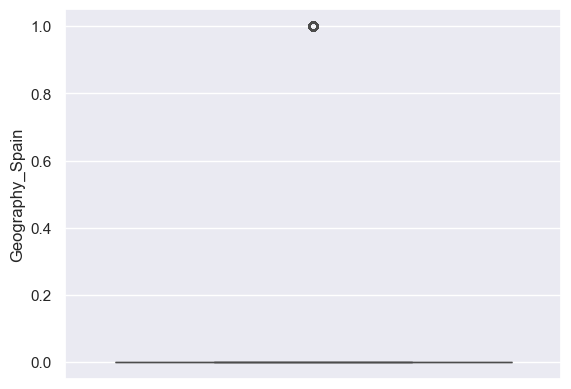

In [17]:
# Plot data for visualization
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
    
for i in list(dataset.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i)

In [18]:
# Split the data into ind variable and dep variable
x = dataset.drop(['Exited'], axis=1)
y = dataset[['Exited']]

In [19]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,False,True


In [20]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


## Feature Scaling required


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1 = sc.fit_transform(x)
pd.DataFrame(x1).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.578736,-0.573809
1,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.578736,1.742740
2,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,-0.578736,-0.573809
3,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.578736,-0.573809
4,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.578736,1.742740


In [22]:
# Check imbalance dataset
y.value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

In [23]:
import imblearn

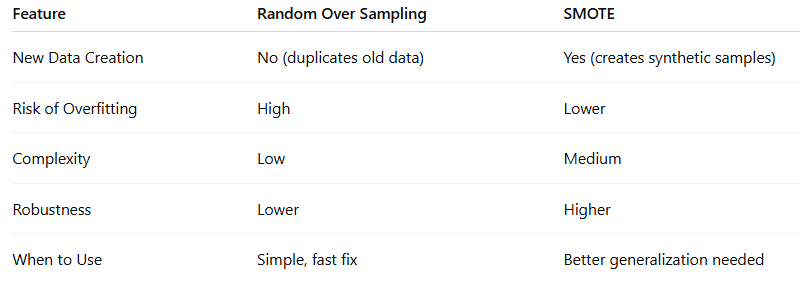

In [24]:
from imblearn.over_sampling import RandomOverSampler # SMOTE
ros = RandomOverSampler() # SMOTE()
x_sam, y_sam = ros.fit_resample(x1, y)
print(x_sam.shape, y_sam.shape, y.shape)

(15926, 11) (15926, 1) (10000, 1)


In [25]:
y_sam.value_counts()

Exited
0         7963
1         7963
Name: count, dtype: int64

In [26]:
# Compute correlation matrix
dataset.corr()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
CreditScore,1.000000,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780
Gender,-0.002857,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,-0.024628,0.016889
Age,-0.003965,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685
Tenure,0.000842,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868
Balance,0.006268,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892
NumOfProducts,0.012238,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039
HasCrCard,-0.005458,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480
IsActiveMember,0.025651,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732
EstimatedSalary,-0.001384,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482
Exited,-0.027094,-0.106512,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667


In [27]:
plt.figure(figsize=(15,12))
sns.heatmap(dataset.corr(), annot=True, cmap='rainbow')

<Axes: >

In [28]:
# Plot data for visualization
sns.pairplot(dataset)

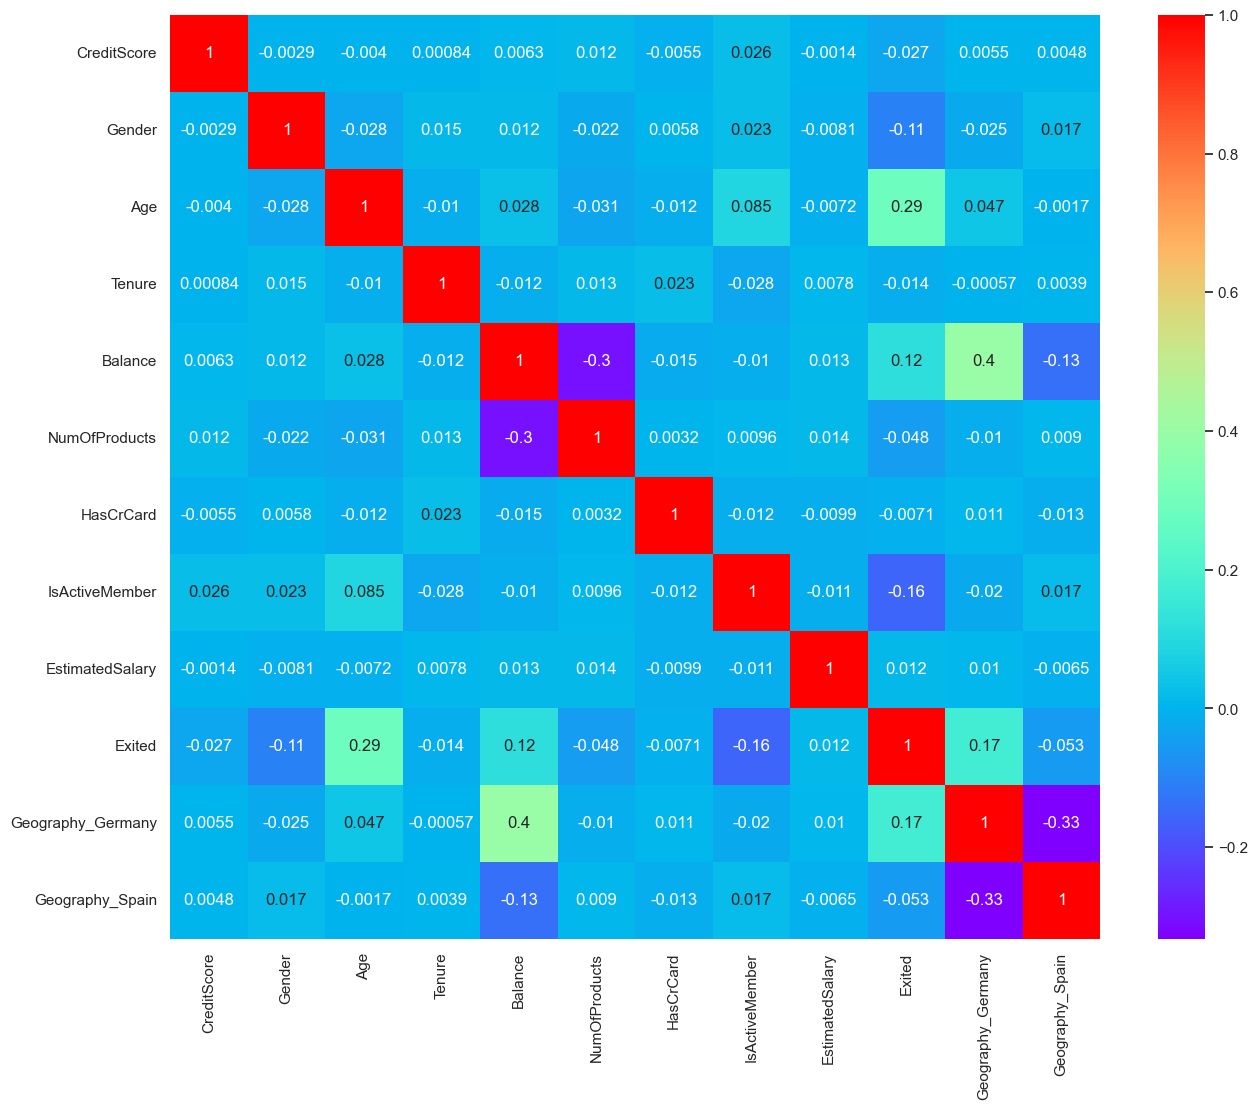

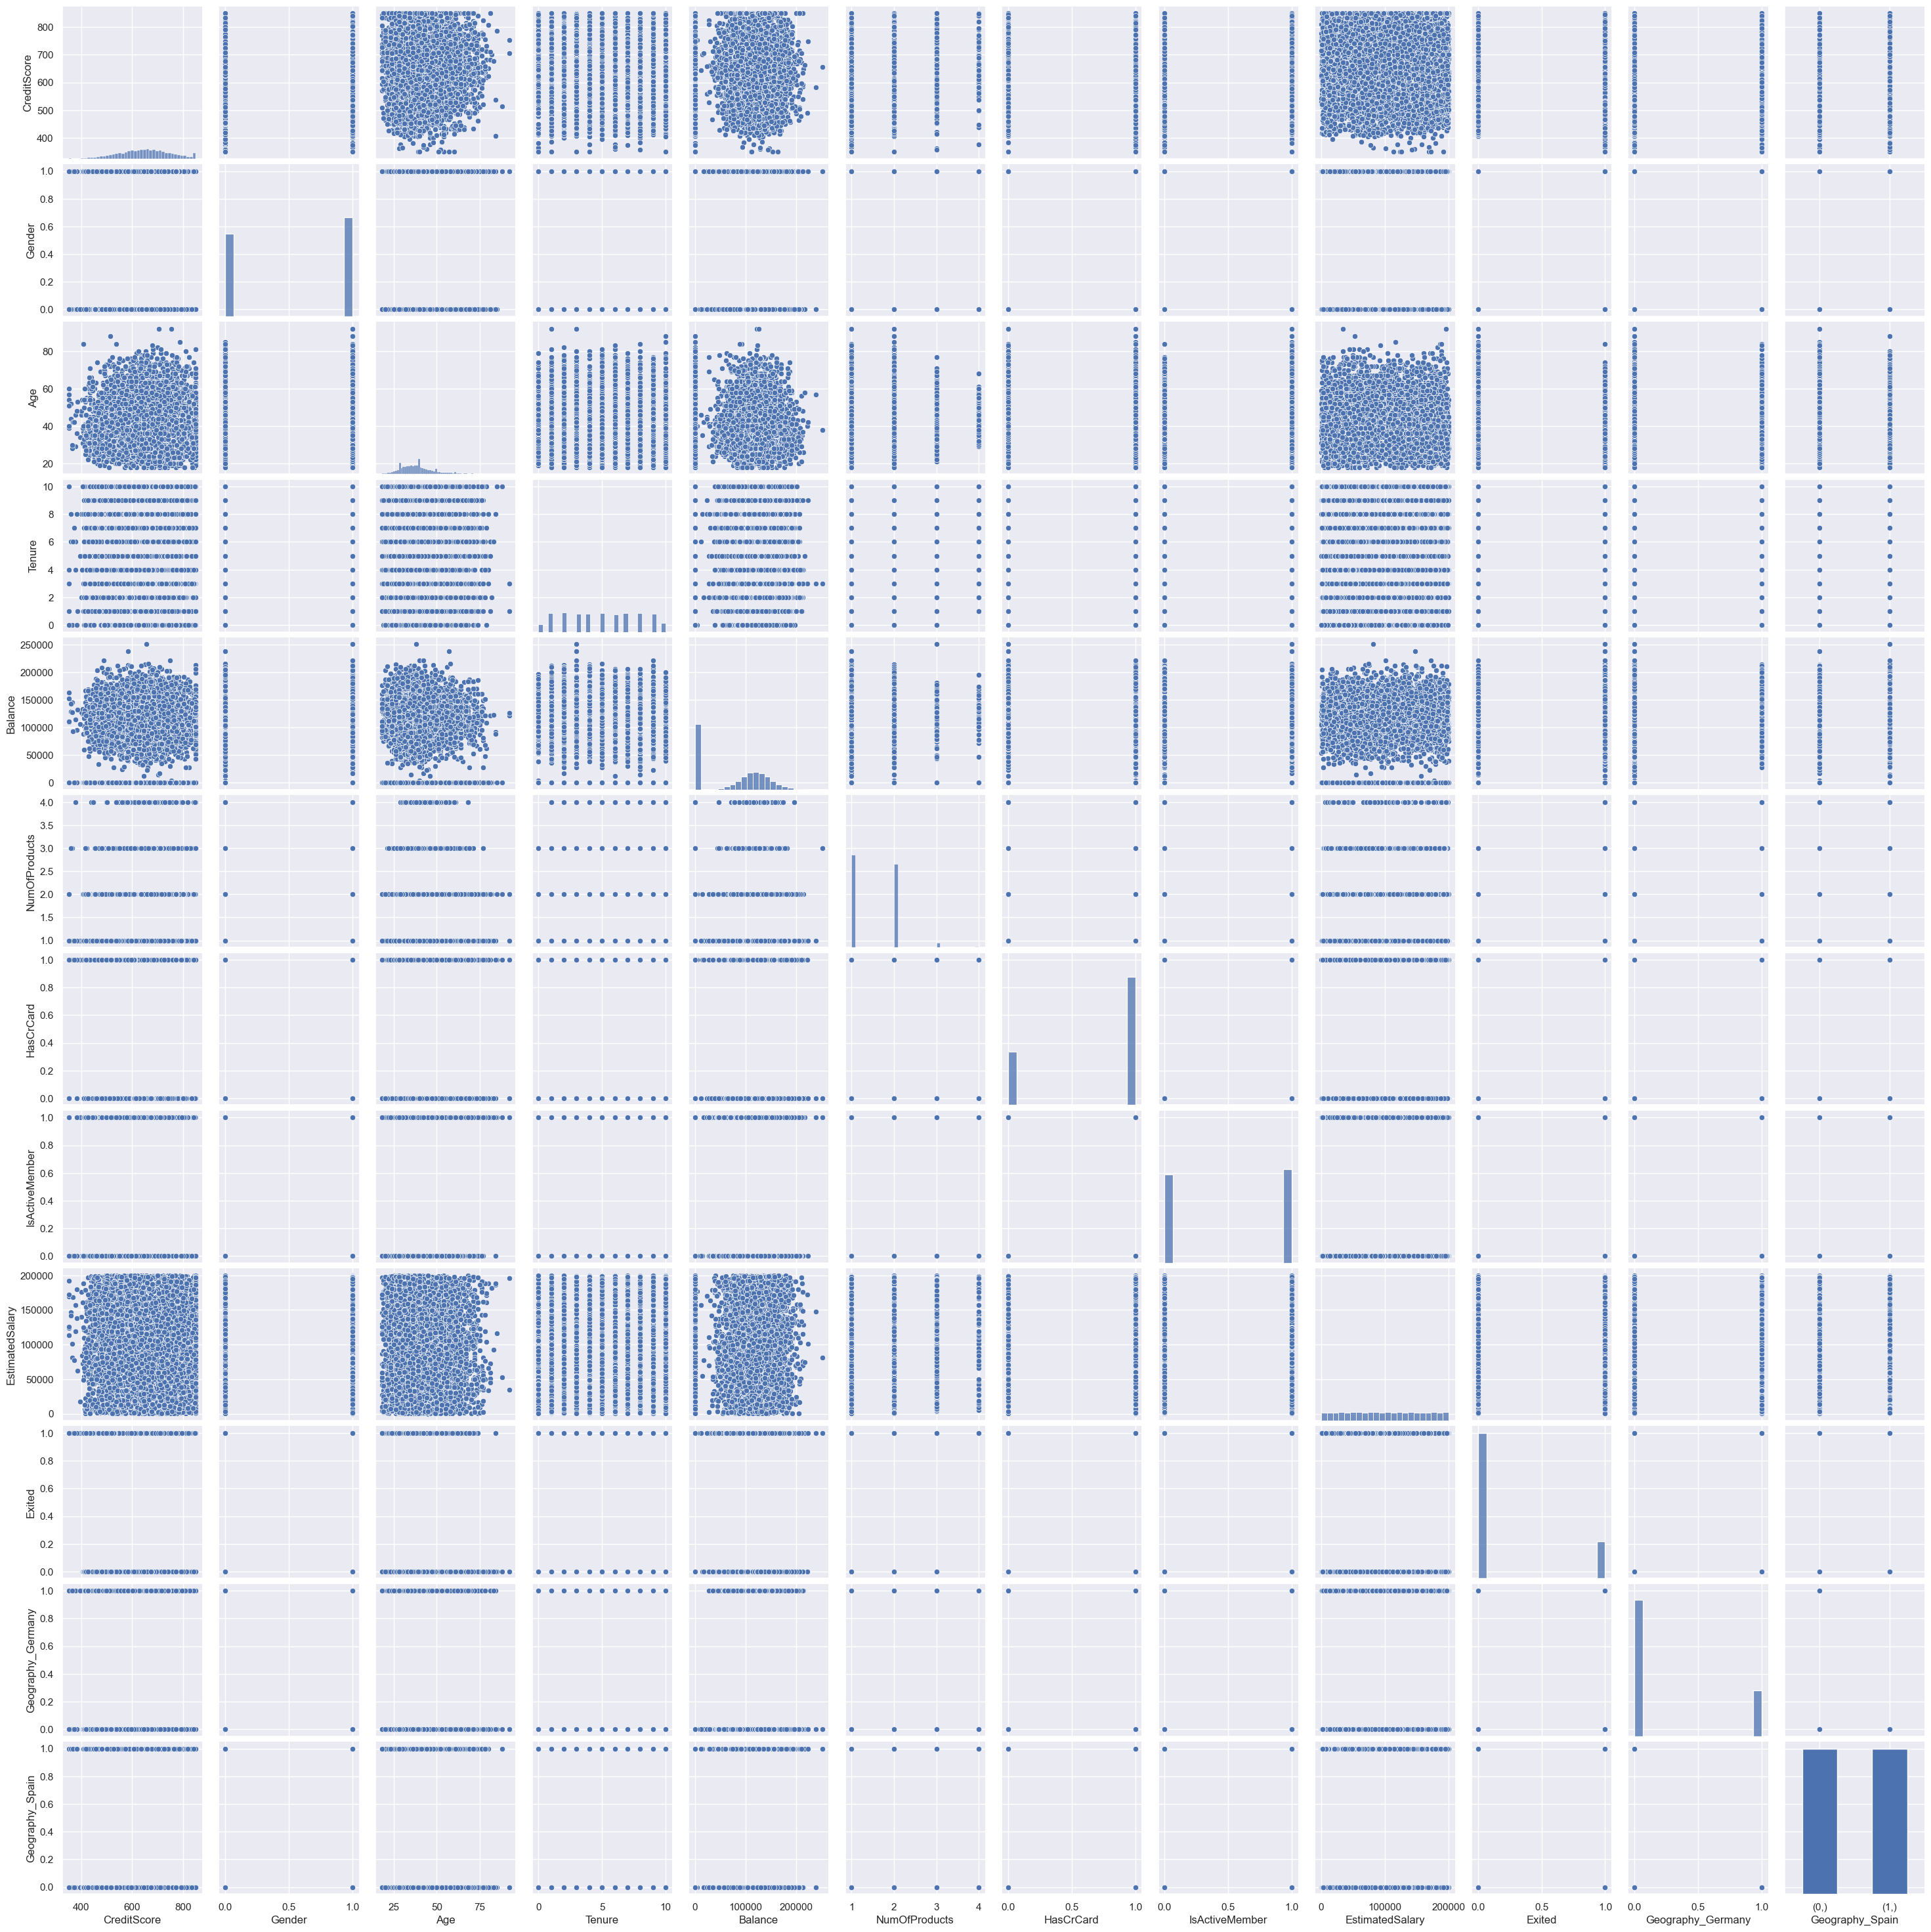

In [29]:
pd.DataFrame(y_sam).value_counts().plot(kind='bar')
plt.show()

In [30]:
pd.DataFrame(y).value_counts().plot(kind='bar')

<Axes: xlabel='Exited'>

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int8   
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(7), int8(1)
memory usage: 732.6 KB


In [32]:
# Keep only non-boolean columns from x
x1 = [col for col in x if dataset[col].dtype != 'bool']
print(x1)

['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [33]:
def histograms(dataset, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(20,15))
    for i , var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        dataset[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name +"Distribution")
    fig.tight_layout()
    plt.show()
    

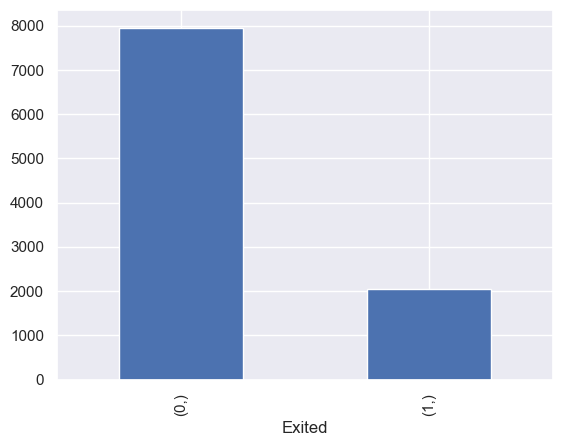

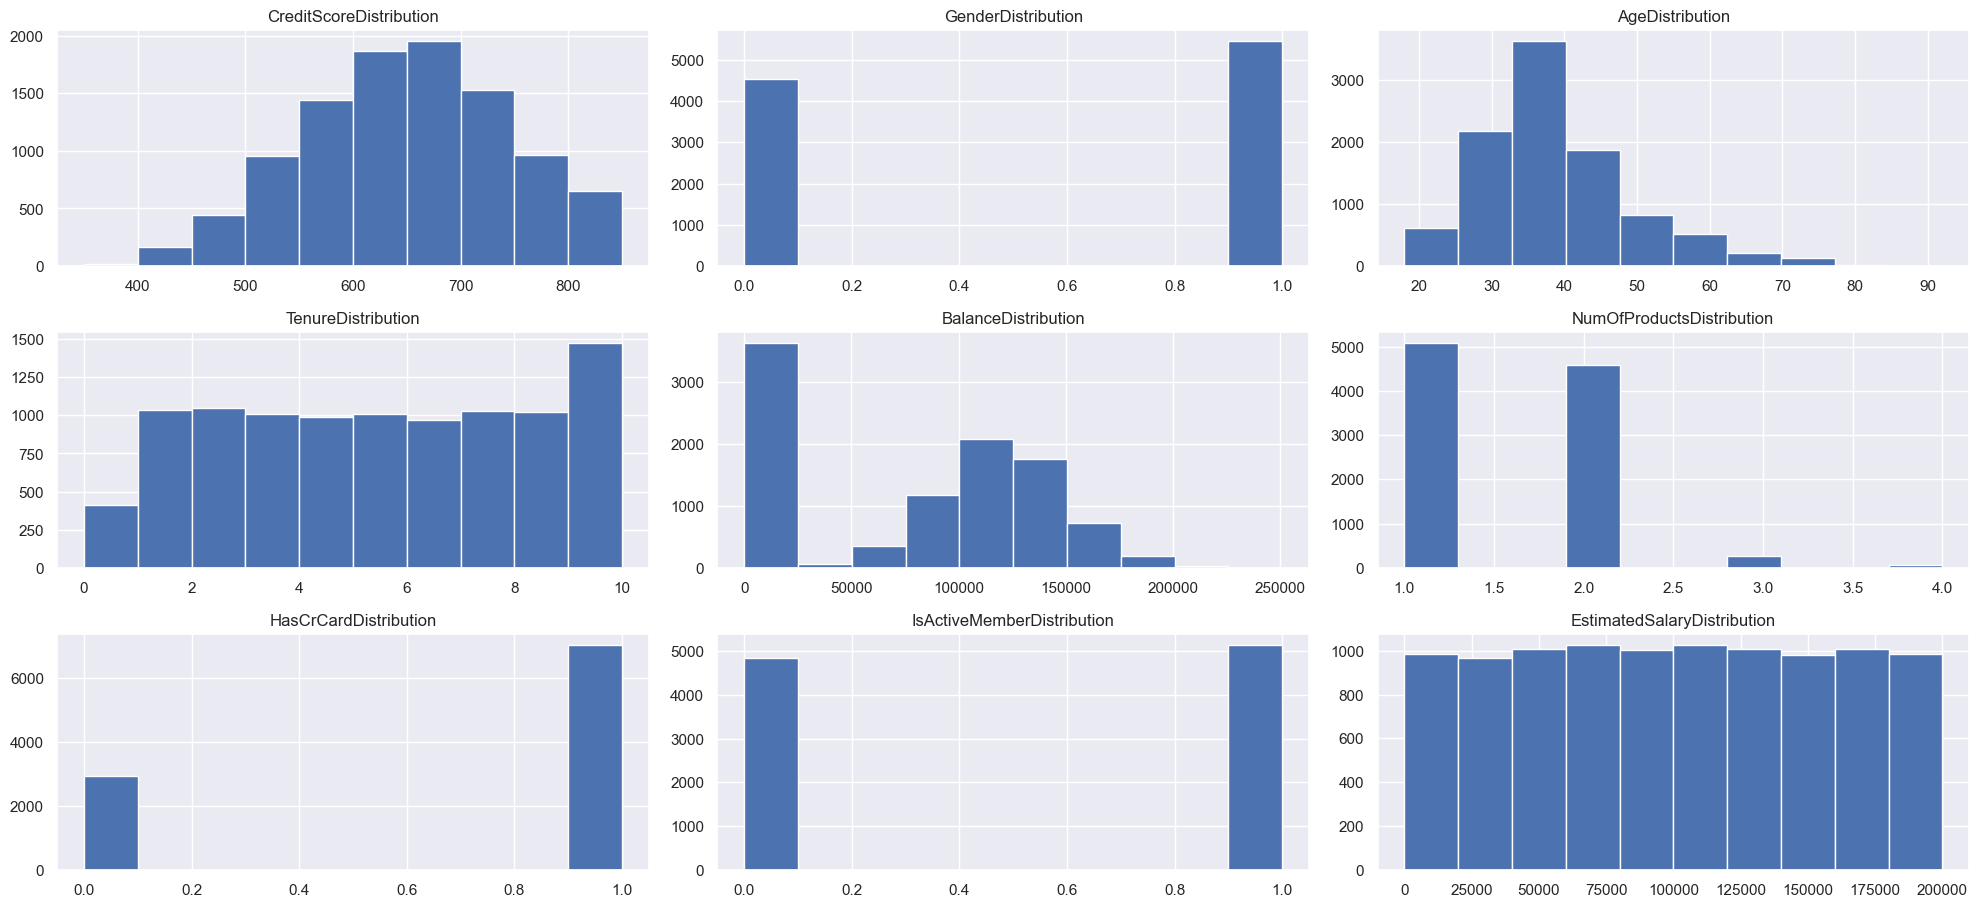

In [34]:
histograms(dataset, x1, 5,3)

In [35]:
# histograms(dataset, x, 5,3)

# Adv EDA :Dtale--->D-Tale is a Python library that allows you to interactively explore, visualize, and edit Pandas DataFrames in your web browser — without writing code for every step.

In [36]:
!pip install dtale

In [37]:
import dtale
import dtale.app as dtale_app

In [38]:
dtale.show(dataset)

# split the data into training and test

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25, random_state=101,
                                                  stratify=y_sam )

# Building Bagging Algorithm 

In [40]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train, y_train)

BaggingClassifier()

In [41]:
# predict
y_pred_train_bgg = bagging.predict(x_train)
y_pred_test_bgg = bagging.predict(x_test)

In [42]:
# Evaluate 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [43]:
print(confusion_matrix(y_train, y_pred_train_bgg))
print()
print(confusion_matrix(y_test, y_pred_test_bgg))

[[5962   10]
 [  22 5950]]

[[1797  194]
 [  74 1917]]


In [44]:
print(classification_report(y_train, y_pred_train_bgg))
print()
print(classification_report(y_test, y_pred_test_bgg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944


              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1991
           1       0.91      0.96      0.93      1991

    accuracy                           0.93      3982
   macro avg       0.93      0.93      0.93      3982
weighted avg       0.93      0.93      0.93      3982



In [45]:
print(accuracy_score(y_train, y_pred_train_bgg))
print()
print(accuracy_score(y_test, y_pred_test_bgg))

0.9973208305425318

0.9326971371170266


# RandomForest Classifier Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, criterion='entropy', 
                            bootstrap=True, oob_score=False)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [47]:
# predict
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [48]:
print(confusion_matrix(y_train, y_pred_train_rf))
print()
print(confusion_matrix(y_test, y_pred_test_rf))

[[5972    0]
 [   0 5972]]

[[1824  167]
 [  48 1943]]


In [49]:
print(classification_report(y_train, y_pred_train_rf))
print()
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5972
           1       1.00      1.00      1.00      5972

    accuracy                           1.00     11944
   macro avg       1.00      1.00      1.00     11944
weighted avg       1.00      1.00      1.00     11944


              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1991
           1       0.92      0.98      0.95      1991

    accuracy                           0.95      3982
   macro avg       0.95      0.95      0.95      3982
weighted avg       0.95      0.95      0.95      3982



In [50]:
print(accuracy_score(y_train, y_pred_train_rf))
print()
print(accuracy_score(y_test, y_pred_test_rf))

1.0

0.9460070316423907


In [51]:
# applying cross validation method in RandomForest
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf, x_train, y_train, cv=10)
accuracy.mean()

0.9394655985646503

In [52]:
print("Trainging Accuracy : ", accuracy.mean())
print()
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test_rf))

Trainging Accuracy :  0.9394655985646503

Test Accuracy:  0.9460070316423907


# HyperParameter Tunning
## GridSearchCV
## RandomSearchCV

In [53]:
rf = RandomForestClassifier()

In [54]:
n_estimators= [20,60,100,200,500]
max_depth=[None,2,4,6,8]
max_features=['auto',"sqrt", "log2"] 
bootstrap=[True, False]
max_samples=[0.5,0.75,1.0,2.0]
min_samples_split=[2,4,8,10]
min_samples_leaf=[1,2,4]

In [55]:
param_grid = {'n_estimators':n_estimators,"max_depth":max_depth,
             "max_features":max_features, "bootstrap":bootstrap,
             "max_samples":max_samples, 'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

print(param_grid)

{'n_estimators': [20, 60, 100, 200, 500], 'max_depth': [None, 2, 4, 6, 8], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False], 'max_samples': [0.5, 0.75, 1.0, 2.0], 'min_samples_split': [2, 4, 8, 10], 'min_samples_leaf': [1, 2, 4]}


In [56]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator= rf, param_grid=param_grid, cv=5,
                     n_jobs=-1, verbose=2 )

In [ ]:
 rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] EN

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.75, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_sa

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=4, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=8, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0.5, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_sampl

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=2.0, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=1.0, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=1.0, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=1.0, min_samples_leaf=2, min_samples_split=4, n_estimators=20; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
# RandomSearchCV

from sklearn.model_selection import RandomizedSearchCV